<a href="https://colab.research.google.com/github/FrankChica/SIG/blob/main/TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import warnings
!pip install geopandas
!pip install rioxarray
#!pip install esda
!pip install pysal
!pip install contextily
warnings.filterwarnings("ignore")
!pip install matplotlib_scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 749.5 kB/s eta 0:

In [73]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation
#from pysal.explore import esda  # Exploratory Spatial analytics
#from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles
from shapely.geometry.point import Point
from matplotlib_scalebar.scalebar import ScaleBar

In [74]:
lads = geopandas.read_file(
    "https://raw.githubusercontent.com/FrankChica/SIG/main/bases/M1.geojson"
).set_index("fid").to_crs(32619) 

In [75]:
db = (geopandas.GeoDataFrame(lads))
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21 entries, 2894 to 4127
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   _uid_       21 non-null     int64   
 1   id          21 non-null     int64   
 2   CODIGO      21 non-null     object  
 3   ESTATUS     21 non-null     object  
 4   LAMBERTX    21 non-null     int64   
 5   LAMBERTY    21 non-null     int64   
 6   LATGRADOS   21 non-null     int64   
 7   LATMIN      21 non-null     int64   
 8   LATSEG      21 non-null     int64   
 9   LONGRADOS   21 non-null     int64   
 10  LONMIN      21 non-null     int64   
 11  LONSEG      21 non-null     int64   
 12  ALTURA      21 non-null     int64   
 13  EPE         21 non-null     int64   
 14  CAN_SATELI  21 non-null     int64   
 15  NOMBRE_CEN  21 non-null     object  
 16  MODALIDA_1  21 non-null     object  
 17  DIRECCION   21 non-null     object  
 18  DEPARTAMEN  21 non-null     object  
 1

Text(0.98, 0.04999999999999999, 'N')

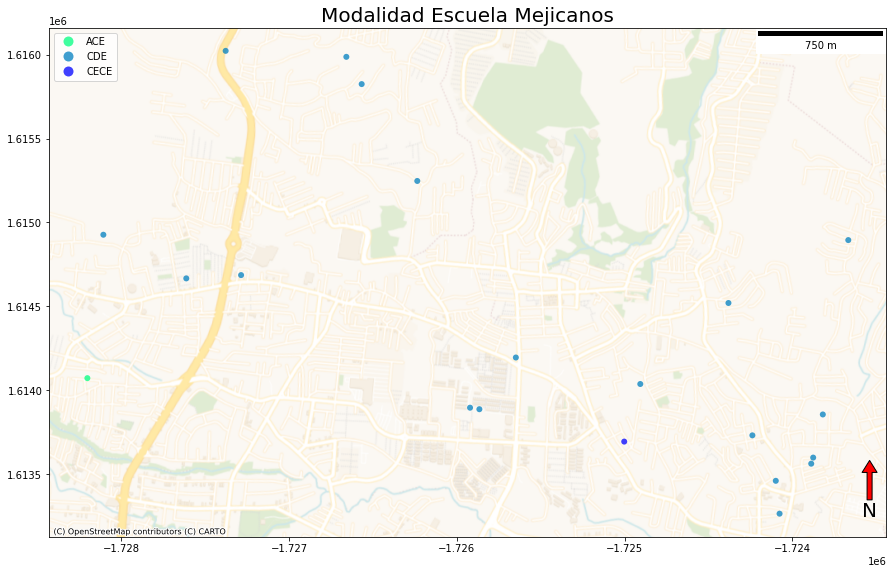

In [79]:
from numpy.core.fromnumeric import size
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(15, 15))
# Build choropleth
db.plot(
    column="MODALIDA_1",
    cmap="winter_r",
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Add basemap
contextily.add_basemap(
    ax,
    crs=db.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)


# add a title
ax.set_title("Modalidad Escuela Mejicanos", fontdict={"fontsize": 20, "fontweight" : 3})

#add scalebar
ax.add_artist(ScaleBar(1))

#add north arrow
x, y, arrow_length = 0.98, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='red', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)



In [66]:
lads = geopandas.read_file(
    "https://raw.githubusercontent.com/FrankChica/SIG/main/bases/M2.geojson"
).set_index("fid").to_crs(32619) 

In [67]:
db = (geopandas.GeoDataFrame(lads))
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 1 to 271
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   NOM_DPTO                   262 non-null    object  
 1   COD_DPTO                   262 non-null    object  
 2   NOM_MUN                    262 non-null    object  
 3   COD_MUN                    262 non-null    object  
 4   COD_MUN4                   262 non-null    object  
 5   TASA_POBR                  262 non-null    float64 
 6   POBR_FISDL                 262 non-null    object  
 7   POB_TOTAL                  262 non-null    int64   
 8   POB_HOMB                   262 non-null    int64   
 9   POB_MUJER                  262 non-null    int64   
 10  _dig_Codigo_Municipio_Alf  262 non-null    int64   
 11  _dig_Municipio             262 non-null    object  
 12  _dig_POB_2008              262 non-null    int64   
 13  _dig_POB_2009              

Text(0.98, 0.04999999999999999, 'N')

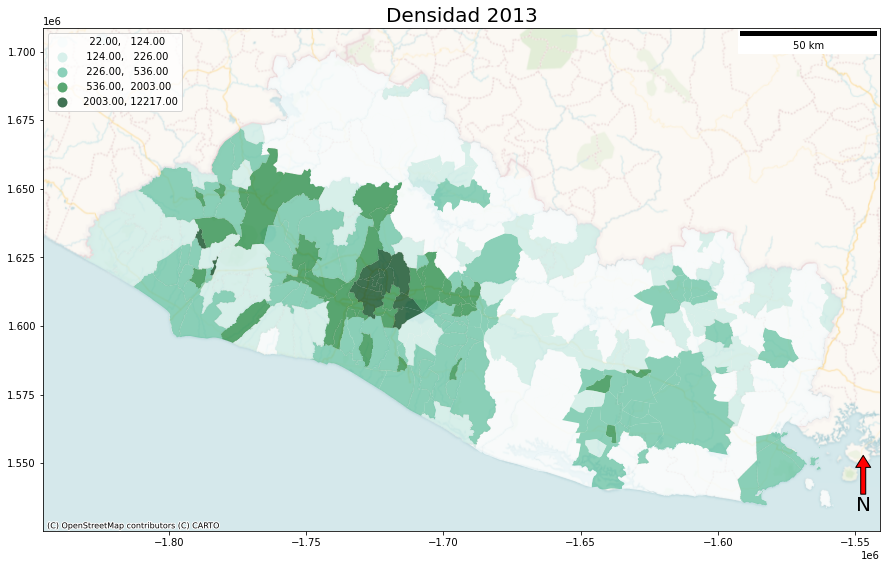

In [71]:
# Set up figure and a single axis
f, bx = plt.subplots(1, figsize=(15, 15))
# Build choropleth
db.plot(
    column="Densidad",
    cmap="BuGn",
    scheme="JenksCaspall",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=bx,
)
# Add basemap
contextily.add_basemap(
    bx,
    crs=db.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)

# add a title
bx.set_title("Densidad 2013", fontdict={"fontsize": 20, "fontweight" : 3})

#add scalebar
bx.add_artist(ScaleBar(1))

#add north arrow
x, y, arrow_length = 0.98, 0.15, 0.1
bx.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='red', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=bx.transAxes)


As in the previous chapter, we require a spatial weights matrix to implement our statistic. Here, we will use eight nearest neighbors for the sake of the example, but the discussion in the earlier chapter on weights applies in this context, and other criteria would be valid too. We also row-standardize them:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


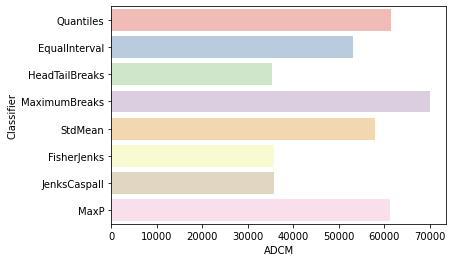

In [51]:
!pip install mapclassify
import mapclassify
import numpy
#Intervalos iguales
ei5 = mapclassify.EqualInterval(db["Densidad"], k=5)
ei5
#Cuantiles
q5 = mapclassify.Quantiles(db.Densidad, k=5)
q5
#Mean standard deviation
msd = mapclassify.StdMean(db["Densidad"])
msd

mb5 = mapclassify.MaximumBreaks(db["Densidad"], k=5)
mb5
#Boxplot
bp = mapclassify.BoxPlot(db["Densidad"])
bp

ht = mapclassify.HeadTailBreaks(db["Densidad"])
ht
#Jenks caspall
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(db["Densidad"], k=5)
jc5
#FisherJenks
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(db["Densidad"], k=5)
fj5

mp5 = mapclassify.MaxP(db["Densidad"], k=5)
mp5
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5
#print(class5)
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

In [ ]:
#print(fits)
#print(adcms)
print(class5)
#print(q5)

(Quantiles               

    Interval       Count
------------------------
[  0.00,   0.00] |    64
(  0.00,  20.42] |    41
( 20.42,  32.63] |    52
( 32.63,  51.64] |    52
( 51.64, 497.78] |    53, EqualInterval           

    Interval       Count
------------------------
[  0.00,  99.56] |   251
( 99.56, 199.11] |     9
(199.11, 298.67] |     1
(298.67, 398.22] |     0
(398.22, 497.78] |     1, HeadTailBreaks          

    Interval       Count
------------------------
[  0.00,  34.07] |   166
( 34.07,  69.29] |    67
( 69.29, 118.39] |    20
(118.39, 197.17] |     7
(197.17, 385.44] |     1
(385.44, 497.78] |     1, MaximumBreaks           

    Interval       Count
------------------------
[  0.00, 100.03] |   251
(100.03, 169.35] |     8
(169.35, 229.60] |     1
(229.60, 385.44] |     1
(385.44, 497.78] |     1, StdMean                 

    Interval       Count
------------------------
(  -inf, -55.54] |     0
(-55.54, -10.73] |     0
(-10.73,  78.87] |   243
( 78.87, 123.68

In [ ]:
# Append class values as a separate column
db["Quantiles"] = q5.yb
db["Equal Interval"] = ei5.yb
db["Head-Tail Breaks"] = ht.yb
db["Maximum Breaks"] = mb5.yb
db["Mean-Standard Deviation"] = msd.yb
db["Fisher-Jenks"] = fj5.yb
db["Jenks Caspall"] = jc5.yb
db["MaxP"] = mp5.yb

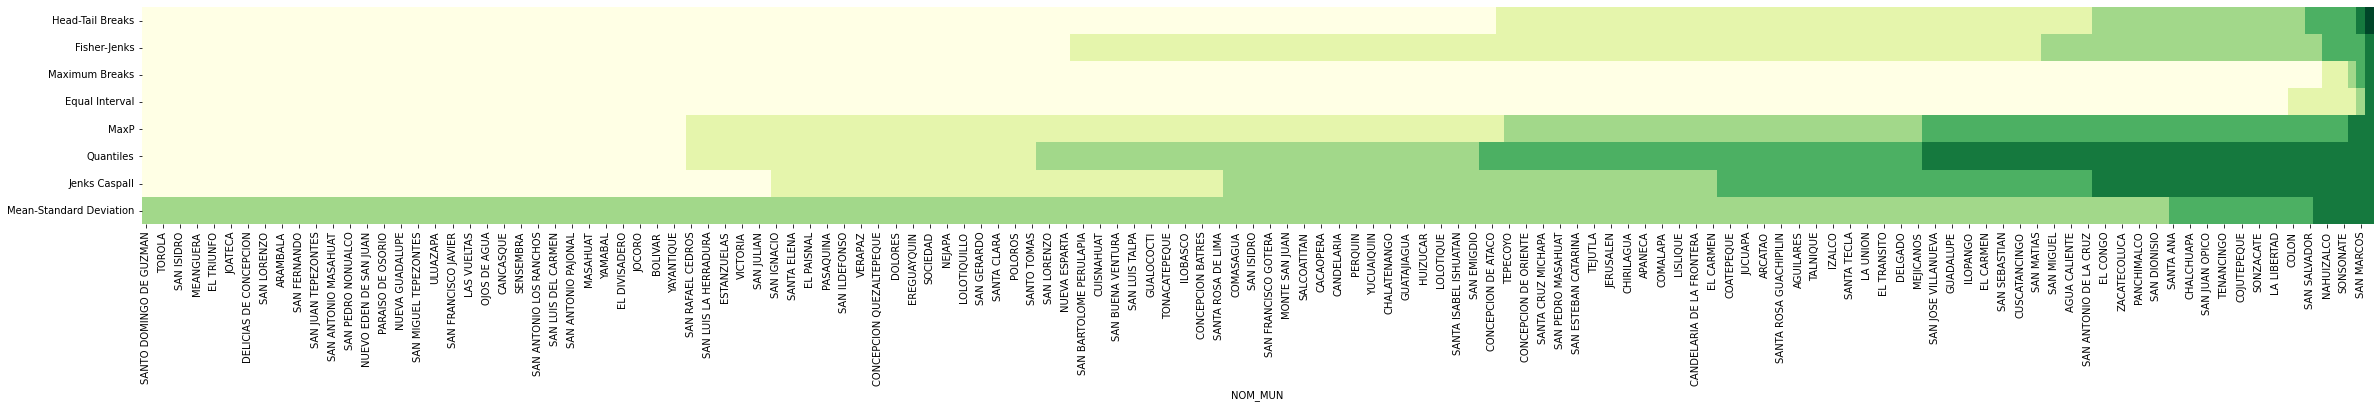

In [ ]:
f, ax = plt.subplots(1, figsize=(40, 4))
seaborn.heatmap(
    db.set_index("NOM_MUN")
    .sort_values("HR2018")[
        [
            "Head-Tail Breaks",
            "Fisher-Jenks",
            "Maximum Breaks",
            "Equal Interval",
            "MaxP",
            "Quantiles",
            "Jenks Caspall",
            "Mean-Standard Deviation",
        ]
    ]
    .T,
    cmap="YlGn",
    cbar=False,
    ax=ax,
)
ax.set_xlabel("NOM_MUN");